#### 국민청원 시즌2 이후 100개 미만 게시물 없음
https://www1.president.go.kr/articles/5872

wordcloud https://github.com/bryan-md/wordcloud/blob/main/wordcloud.ipynb

# 데이터프레임 만들기

In [1]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='localhost', port=3306, 
                       user='root', passwd='Myloxyloto5!', 
                       db='petition_db', charset='utf8mb4', autocommit=True,
                      cursorclass=pymysql.cursors.DictCursor)

cursor = conn.cursor()

sql = 'select * from petitions where num_agree >= 100;'
cursor.execute(sql)
result = cursor.fetchall()

df = pd.DataFrame(result)
df.tail()
print(len(df))

34904


# 시각화

In [2]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import platform 
from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\TimesNewRoman400.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [4]:
df.shape

(34904, 9)

In [4]:
df = df.drop(['crawled_at', 'status'], axis=1)
#df.head()

In [5]:
df['begin']=pd.to_datetime(df['begin'])
df['end']=pd.to_datetime(df['end'])

In [8]:
df.head()

,category,begin,end,content,num_agree,petition_idx,title
0,경제민주화,2017-08-19,2017-08-26,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,2137,28,소액주주를 보호해주십시오
1,기타,2017-08-19,2017-09-18,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,679,34,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...
2,기타,2017-08-19,2017-09-18,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...,415,37,황우석박사님 연구재개 허용 촉구합니다.
3,외교/통일/국방,2017-08-19,2017-09-18,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,218,40,국가유공자등 예우및 지우너에 관한 법률 시행령 개정
4,외교/통일/국방,2017-08-19,2017-09-18,지금부터 67년전 1950년 6.25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...,227,41,국가유공자등 예우및 지우너에 관한 법률 시행령 개정


In [6]:
change_value_dict= {'정치개혁':'Political Reform', '인권/성평등' : 'Human Rights/Gender Eqality', '기타' : 'Others', 
                    '보건복지':'Health Care', '육아/교육':'Child Care/Education', '안전/환경':'Safety/Environment', 
                    '교통/건축/국토':'Transportation/Construction/Territory', '행정':'Administration',
       '문화/예술/체육/언론':'Culture/Media', '외교/통일/국방':'Diplomacy/Defense', '경제민주화':'Economy', 
                    '일자리':'Jobs', '반려동물':'Emotional Support Animals', '미래':'Future', '성장동력':'Growth Power',
       '저출산/고령화대책':'Low Birth/Aging Problems', '농산어촌':'Agriculture'}
df=df.replace({'category': change_value_dict})

#### 연도별 데이터프레임 나누기

In [15]:
from datetime import datetime

In [16]:
df2017 = df[(df['begin'] >= datetime(2017, 8, 19)) & (df['begin'] <= datetime(2017, 12, 31))]
df2018 = df[(df['begin'] >= datetime(2018, 1, 1)) & (df['begin'] <= datetime(2018, 12, 31))]
df2019 = df[(df['begin'] >= datetime(2019, 1, 1)) & (df['begin'] <= datetime(2019, 12, 31))]
df2020 = df[(df['begin'] >= datetime(2020, 1, 1)) & (df['begin'] <= datetime(2020, 12, 31))]

In [15]:
df2018[df2018['category']=='정치개혁'].sort_values(by='num_agree', ascending=False).head(20)

,category,begin,end,content,num_agree,petition_idx,title
4345,정치개혁,2018-03-13,2018-04-12,공약은 중요한 것입니다.\n국민과의 약속입니다.\n대통령님은 공약을 이행해주십시오....,304320,165796,국민들은 정부 개헌안을 지지합니다. 정부의 개헌을 꼭 실현시켜 주십시오.
2052,정치개혁,2018-01-15,2018-02-14,최저시급 인상 반대하던 의원들부터 최저시급으로 책정해주시고 최저시급으로 일하는 노동...,277674,96427,국회의원 급여를 최저시급으로 책정해 주세요
13878,정치개혁,2018-10-04,2018-11-03,리벤지포르노 징역이라고 네이버에 치면제일 먼저 뜨는 기사가 뭔줄 아십니까?“리벤지포...,275806,397558,최**과 이하 비슷한 리벤지포르노 범들 강력징역해주세요.
6074,정치개혁,2018-04-16,2018-05-16,이미 청와대가 선관위에 질의사항으로 접수한\n김기식 금융감독원장의 정치자금법 위반 ...,260624,201953,선관위의 위법사항 내용에 따른 국회의원 전원 위법사실 여부 전수조사를 청원합니다.
16645,정치개혁,2018-12-07,2019-01-06,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%로 인상...,243938,462623,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%.. 셀...
14694,정치개혁,2018-10-24,2018-11-23,https://pann.nate.com/talk/343936115저는 지난 8월 2...,211546,418376,소년법 개정을 촉구 합니다! 17살 조카가 자살을 했습니다
11259,정치개혁,2018-07-22,2018-08-21,한청년의 죽음에서 시작된 그 내막에 감춰진 검은세력과 그들의 뒤를 봐주던 세력......,163917,314212,불법폭력조직 코마트레이드와 연루된 성남시장 은수미와 경기도지사 이재명 즉각 사퇴하라
7029,정치개혁,2018-04-28,2018-05-28,"헌법 제4조에서는 “대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적...",153735,214435,자유한국당 해산심판 요청
12555,정치개혁,2018-08-22,2018-09-21,미국계 헤지펀드 엘리엇과 정부의 삼성물산-제일모직 관련 소송에 제출된 법무부 답변서...,104268,350397,엘리엇과의 소송에 제출된 법무부 답변서 관련 의혹에 대해 진상조사와 감사를 청원합니다
16644,정치개혁,2018-12-07,2019-01-06,현재 우리나라의 의원 연은 1인당 GDP 대비 5배 수준으로 OECD국가들 중에서도...,81590,462618,국회의원 연봉인상을 반대합니다.


In [13]:
df2019[df2019['category']=='인권/성평등'].sort_values(by='num_agree', ascending=False).head(15)

,category,begin,end,content,num_agree,petition_idx,title
21294,인권/성평등,2019-06-04,2019-07-04,대통령님!!!우리딸을 성폭행한 후 잔인하게 목졸라 죽인 극악무도한 살인마를 사형시켜...,348417,580639,우리딸을 성폭행한 후 잔인하게 목졸라 죽인 극악무도한 살인마를 사형시켜 주세요
19955,인권/성평등,2019-03-30,2019-04-29,안녕하세요. 증인 윤지오입니다.우선 고인의 이름으로 불리우는 사건 자체가 피해자가 ...,318057,578761,안녕하세요. 증인 윤지오입니다.
24225,인권/성평등,2019-11-15,2019-12-15,"올해 초, 과거 당했던 성폭력을 고소하게 된 피해자입니다.가해자는 제게 강간미수에 ...",264102,583605,가해자 중심적인 성범죄의 양형기준을 재정비해주세요.
21949,인권/성평등,2019-07-08,2019-08-07,대법원이 리얼돌 수입을 허용하는 판결을 냈습니다. 리얼돌이 인간의 존엄성을 심각하게...,263792,581300,리얼돌 수입 및 판매를 금지해주세요
23409,인권/성평등,2019-09-23,2019-10-23,현재 SNS에서 06년생으로 추정되는 다수의 인원들이 한 여학생을 폭행 하여 영상에...,250092,582785,06년생 집단 폭행 사건
24459,인권/성평등,2019-12-02,2020-01-01,저는 지난 11월 4일 어린이집과 아파트 단지내에서 같은 어린이집에 다니는 동갑내기...,241135,583841,아동간 성폭력사고 시 강제력을 가진 제도를 마련해주시기 바랍니다.
23745,인권/성평등,2019-10-15,2019-11-14,조국 교수 가족 수사 과정에서 빚어진 가족 뿐 아니라 주변 사람들에 대한 검찰의 무...,226434,583122,국가인권위가 조국 장관과 가족 수사과정에서 빚어진 무차별 인권 침해를 조사할 것을...
18776,인권/성평등,2019-02-19,2019-03-21,억울하게 죽은 친구과 친구를 죽음까지 몰아간 범죄자들을 강하게 처벌해주세요.안녕하세...,217786,531087,영광 여고생 사건 가해자들 강력 처벌해주새요
21108,인권/성평등,2019-05-27,2019-06-26,참고기사 : *****:*********************************...,216862,580452,2019형제*****호 가해용의자의 상장 취소 및 장학금 환수와 구속수사 및 가해용...
22449,인권/성평등,2019-08-05,2019-09-04,지금와서 누구를 처단하자는게 아닙니다.국민의 알권리를 침해하지 말라는겁니다.24년입...,213858,581808,고 김성재님의 사망 미스테리를 다룬 그것이 알고싶다 방영하게 해주세요


# **아이디어** : 게시물 개수, 각 카테고리별, 기한별, top 10 / Wordcloud 
    -> 전체 기간, 2017, 18, 19, 20년

파이 그래프(어떤 카테고리가 가장 많은지?), 시계열 그래프(카테고리별) => 워드클라우드 전체기간 카테고리 내용 보여주기

어떤 그림을 쓸지? 설명? 연도별 카테고리 워드클라우드, 미국과의 비교? 
바랍니다. 저희, 우리, 딸, 아들, 아이 -> 개인의 문제로만 치부, 사회문제가 되지 않는 한계
여성 인권 문제 -> 형량에 치중, 여성 피해자들의 보호 등에 대해서는 이야기 하지 않음.
공론장보다는 호소의 느낌이 강하다 ->  사회문화적 배경? 대통령에 대한...독재세력의 역사
+ 전체 top 10을 보여주고 여기서 정치개혁, 범죄 피해에 대한 호소, 정치세력 양분화, 혐오발언 등으로 묶을 수 있으면 묶기

기타는 제외

### 전체 기간 청원 게시물 개수

### 카테고리 별 청원수 (전체기간)

In [7]:
petition_ctgry = df['category'].value_counts()

In [8]:
petition_ctgry.index

Index(['Political Reform', 'Human Rights/Gender Eqality', 'Others',
       'Health Care', 'Child Care/Education', 'Safety/Environment',
       'Transportation/Construction/Territory', 'Administration',
       'Culture/Media', 'Diplomacy/Defense', 'Economy', 'Jobs',
       'Emotional Support Animals', 'Future', 'Growth Power',
       'Low Birth/Aging Problems', 'Agriculture'],
      dtype='object')

In [40]:
petition_ctgry.unique()

array([3808, 3794, 3759, 3748, 3307, 3120, 3066, 2136, 1840, 1579, 1325,
       1312,  731,  614,  269,  268,  228], dtype=int64)

In [41]:
total=df['category'].value_counts().sum()

In [42]:
label=petition_ctgry.sort_values(ascending=False).index.tolist()

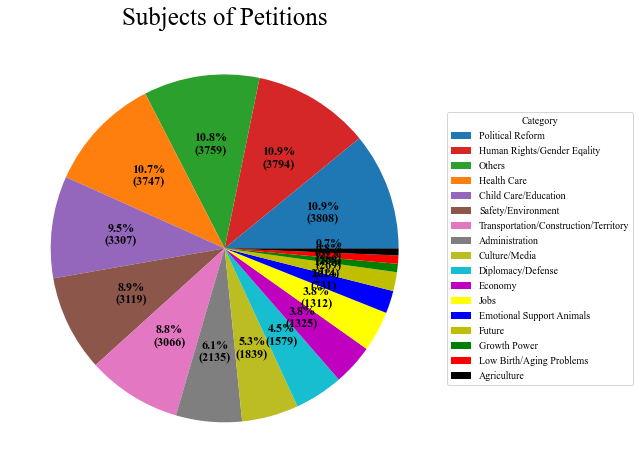

In [9]:

color=['tab:blue','tab:red','tab:green','tab:orange','tab:purple',
       'tab:brown','tab:pink','tab:gray','tab:olive',
      'tab:cyan','m','yellow','blue','y','green','red','k']

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

data=petition_ctgry.sort_values(ascending=False)
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct:func(pct,data),
                                  textprops=dict(color="k"), colors=color)

ax.legend(wedges, petition_ctgry.index,
          title="Category",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Subjects of Petitions", fontsize=25)
plt.savefig('전체기간_카테고리_별_게시물_비율.png')
plt.show()


https://yganalyst.github.io/data_handling/Pd_5/

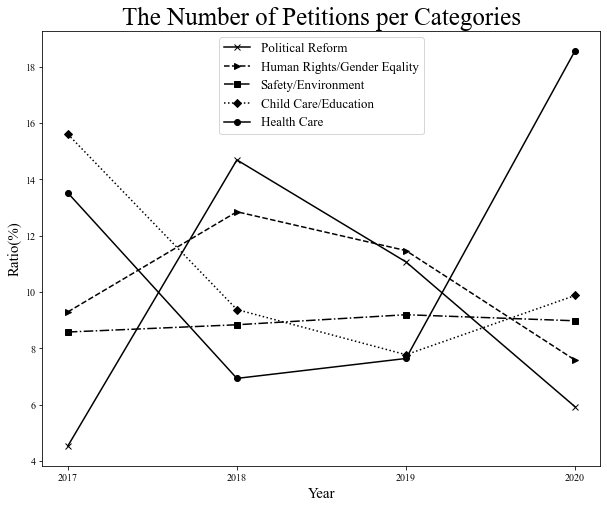

In [18]:
def draw_graph(a10,b20,c30,category4,category5):
    a=(len(df2017[df2017['category']==a10])/len(df2017))*100
    b=(len(df2018[df2018['category']==a10])/len(df2018))*100
    c=(len(df2019[df2019['category']==a10])/len(df2019))*100
    d=(len(df2020[df2020['category']==a10])/len(df2020))*100
    
    a1=len(df2017[df2017['category']==b20])/len(df2017)*100
    b1=len(df2018[df2018['category']==b20])/len(df2018)*100
    c1=len(df2019[df2019['category']==b20])/len(df2019)*100
    d1=len(df2020[df2020['category']==b20])/len(df2020)*100
    
    a2=len(df2017[df2017['category']==c30])/len(df2017)*100
    b2=len(df2018[df2018['category']==c30])/len(df2018)*100
    c2=len(df2019[df2019['category']==c30])/len(df2019)*100
    d2=len(df2020[df2020['category']==c30])/len(df2020)*100
    
    a3=len(df2017[df2017['category']==category4])/len(df2017)*100
    b3=len(df2018[df2018['category']==category4])/len(df2018)*100
    c3=len(df2019[df2019['category']==category4])/len(df2019)*100
    d3=len(df2020[df2020['category']==category4])/len(df2020)*100
    
    a4=len(df2017[df2017['category']==category5])/len(df2017)*100
    b4=len(df2018[df2018['category']==category5])/len(df2018)*100
    c4=len(df2019[df2019['category']==category5])/len(df2019)*100
    d4=len(df2020[df2020['category']==category5])/len(df2020)*100
    
    plt.plot(['2017','2018','2019','2020'], [a,b,c,d], label=a10, marker='x', color='k')
    plt.plot(['2017','2018','2019','2020'], [a1,b1,c1,d1], label=b20, linestyle='dashed', marker='>',color='k')
    plt.plot(['2017','2018','2019','2020'], [a2,b2,c2,d2], label=c30, linestyle='dashdot', marker='s',color='k')
    plt.plot(['2017','2018','2019','2020'], [a3,b3,c3,d3], label=category4, linestyle='dotted', marker='D',color='k')
    plt.plot(['2017','2018','2019','2020'], [a4,b4,c4,d4], label=category5, linestyle='solid', marker='o',color='k')
    
    ax = plt.gca()
    ax.legend(fontsize=13)
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Ratio(%)', fontsize=15)
    ax.set_title('The Number of Petitions per Categories', fontsize=25)
    plt.savefig('연도별_카테고리_게시물_개수.png')
    plt.show()
    
    
draw_graph('Political Reform','Human Rights/Gender Eqality','Safety/Environment','Child Care/Education','Health Care')

## TOP 10

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import matplotlib

### 전체기간 청원 게시물 청원동의 TOP 10

In [25]:
df2=df.sort_values(by='num_agree',ascending = False).head(10)
df2.set_index(np.arange(1,len(df2.index)+1))

,category,begin,end,content,num_agree,petition_idx,title
1,안전/환경,2020-03-18,2020-04-17,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,2715626,586819,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요
2,안전/환경,2020-03-20,2020-04-19,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",2026252,586880,텔레그램 n번방 가입자 전원의 신상공개를 원합니다
3,정치개혁,2019-04-22,2019-05-22,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,1831900,579682,자유 한국당 정당해산 청원
4,기타,2020-02-26,2020-03-27,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,1504597,585683,문재인 대통령님을 응원 합니다!
5,정치개혁,2020-02-04,2020-03-05,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,1469023,584936,문재인 대통령 탄핵을 촉구합니다.
6,인권/성평등,2020-02-22,2020-03-23,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",1449521,585290,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다."
7,안전/환경,2018-10-17,2018-11-16,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,1192049,408609,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.
8,기타,2020-04-02,2020-05-02,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,1007040,587624,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요
9,보건복지,2020-01-23,2020-02-22,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,761833,584593,중국인 입국 금지 요청
10,정치개혁,2019-08-21,2019-09-20,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반드시 해주...,757730,582190,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!


### 연도별 청원동의 TOP 10

### 2017년

In [48]:
df2017.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
176,미래,2017-09-06,2017-12-05,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,615354,10949,조두순 출소반대
139,인권/성평등,2017-09-03,2017-11-02,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,296330,1785,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...
752,보건복지,2017-11-17,2017-12-17,"청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",281985,45581,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원"
1086,성장동력,2017-12-03,2018-01-02,2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,255554,57132,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.)
435,인권/성평등,2017-09-30,2017-10-30,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,235372,18278,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.
1633,성장동력,2017-12-28,2018-01-27,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,228295,76020,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?
624,안전/환경,2017-11-04,2017-12-04,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",216774,26024,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.
860,기타,2017-11-24,2017-12-24,"3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",211064,49083,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!"
642,교통/건축/국토,2017-11-06,2017-12-06,안녕하세요\n저는 10.1일까지 아들하나와 딸 둘을 둔 세아이 엄마였습니다\n10....,146068,26517,경사진주차장에 경고문구 의무화와 자동차 보조제동장치 의무화를 요청합니다
872,육아/교육,2017-11-24,2017-12-24,"강력히 주장합니다.\n교육의 본질을, 교사들의 교육관을 흔들리게 하는 성과급제 폐지...",134637,50257,교원 성과급 폐지를 강력히 요청합니다.


### 2018

In [26]:
df2018.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
14247,안전/환경,2018-10-17,2018-11-16,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,1192049,408609,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.
9239,외교/통일/국방,2018-06-13,2018-07-13,2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,714875,269548,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ..."
3443,문화/예술/체육/언론,2018-02-19,2018-03-21,"오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",614127,142600,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다"
7879,인권/성평등,2018-05-11,2018-06-10,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,419006,230552,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.
15043,인권/성평등,2018-10-31,2018-11-30,http://m.news1.kr/articles/?3464603관련 기사입니다.20...,416093,426834,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에..."
11246,육아/교육,2018-07-22,2018-08-21,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,413924,314584,23개월 아기가 폭행에 장이 끊어져 죽었습니다.
13721,교통/건축/국토,2018-10-02,2018-11-01,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",406655,395955,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요
15608,인권/성평등,2018-11-09,2018-12-09,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,397079,437737,억울하게 떠나신 저의 아버지의 원한을 풀어주세요
15786,인권/성평등,2018-11-14,2018-12-14,11월 13일 새벽4시 경 이수역의 한 맥주집에서 남자 다섯명이 여성 두 명을 폭행...,365418,442093,이수역 폭행사건
2226,외교/통일/국방,2018-01-20,2018-02-19,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,360905,105105,나경원 의원 평창올림픽 위원직을 파면시켜주세요


### 2019

In [27]:
df2019.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
20252,정치개혁,2019-04-22,2019-05-22,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,1831900,579682,자유 한국당 정당해산 청원
22733,정치개혁,2019-08-21,2019-09-20,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반드시 해주...,757730,582190,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!
19389,기타,2019-03-12,2019-04-11,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다. 수사 기간을 연장해 장자연씨가...,738566,559071,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다.
22890,정치개혁,2019-08-28,2019-09-27,윤석열은 압수수색에서 나온 교수에 관한 정보를 압수가 되어 정보가 검토되자 마자 즉...,481076,582351,기밀누설죄를 범한 윤석열 총장을 처벌해 주십시요.
24068,안전/환경,2019-11-11,2019-12-11,안녕하십니까? 저는 지난 9월 11일에 충남 아산의 어린이 보호구역내에서 횡단보도를...,415691,583543,어린이들의 생명안전법안 통과를 촉구해주시길 간곡히 부탁드립니다
19225,기타,2019-03-08,2019-04-07,"고 장자연씨 관련, 어렵게 증언한 윤**씨의신변보호를 요청드립니다.목격자진술은 정말...",386506,553263,고 장자연씨 관련 증언한 윤**씨 신변보호 청원
20000,안전/환경,2019-04-05,2019-05-05,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,380769,579426,소방공무원을 국가직으로 전환해주세요
22888,정치개혁,2019-08-28,2019-09-27,나경원 자한당 원내대표의 각종 의혹ㆍ논란들이 일파만파 번지고 있습니다. 야권정치인의...,365040,582349,나경원 자한당 원내대표의 각종 의혹에 대한 특검 요청!
19975,문화/예술/체육/언론,2019-04-04,2019-05-04,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",364920,579401,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.
21199,인권/성평등,2019-06-04,2019-07-04,대통령님!!!우리딸을 성폭행한 후 잔인하게 목졸라 죽인 극악무도한 살인마를 사형시켜...,348417,580639,우리딸을 성폭행한 후 잔인하게 목졸라 죽인 극악무도한 살인마를 사형시켜 주세요


### 2020

In [28]:
df2020.sort_values(by='num_agree', ascending=False).head(10)

,category,begin,end,content,num_agree,petition_idx,title
27323,안전/환경,2020-03-18,2020-04-17,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,2715626,586819,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요
27384,안전/환경,2020-03-20,2020-04-19,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",2026252,586880,텔레그램 n번방 가입자 전원의 신상공개를 원합니다
26198,기타,2020-02-26,2020-03-27,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,1504597,585683,문재인 대통령님을 응원 합니다!
25454,정치개혁,2020-02-04,2020-03-05,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,1469023,584936,문재인 대통령 탄핵을 촉구합니다.
25805,인권/성평등,2020-02-22,2020-03-23,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",1449521,585290,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다."
28124,기타,2020-04-02,2020-05-02,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,1007040,587624,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요
25112,보건복지,2020-01-23,2020-02-22,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,761833,584593,중국인 입국 금지 요청
30824,안전/환경,2020-07-03,2020-08-02,2020년 6월 8일 월요일 오후 3시 15분오후 3시 15분경 어머님의 호흡이 너...,735972,590341,응급환자가 있는 구급차를 막아세운 택시 기사를 처벌해 주세요.
27389,안전/환경,2020-03-20,2020-04-19,n번방 박사라는 악마같은 인간은아동·청소년을 포함한 수십 명의 여성을 협박·강요해 ...,650579,586885,"가해자 n번방박사,n번방회원 모두 처벌해주세요"
33076,기타,2020-09-10,2020-10-10,지난 새벽 저희 아버지는 평소처럼 치킨 배달을 하러 가셨습니다. 그날따라 저녁부터 ...,639617,592609,9월9일01시경 을왕리 음주운전 역주행으로 참변을 당한 50대 가장의 딸입니다.


## 연도별 카테고리 워드클라우드

In [2]:
import nltk
from konlpy.tag import Okt
okt = Okt()

In [16]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib as mpl

#### 워드클라우드에 필요한 조건

In [ ]:
category_name = ['인권/성평등', '안전/환경', '육아/교육', '정치개혁','보건복지']
ctgry_cond = df['category'] == category_name

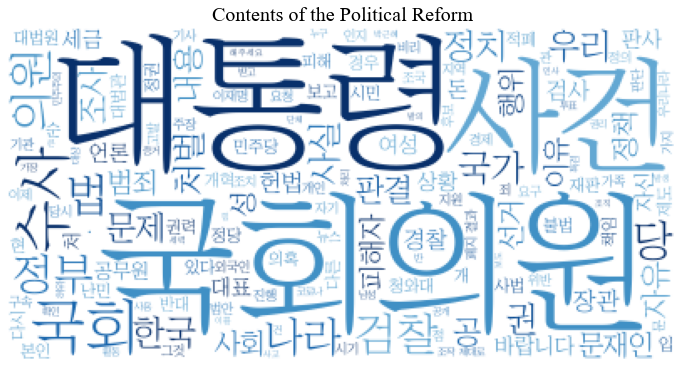

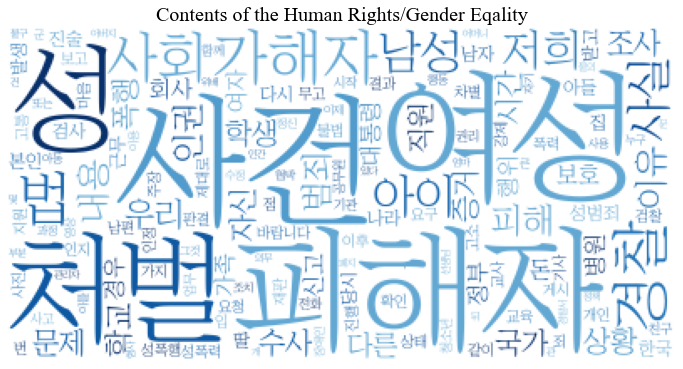

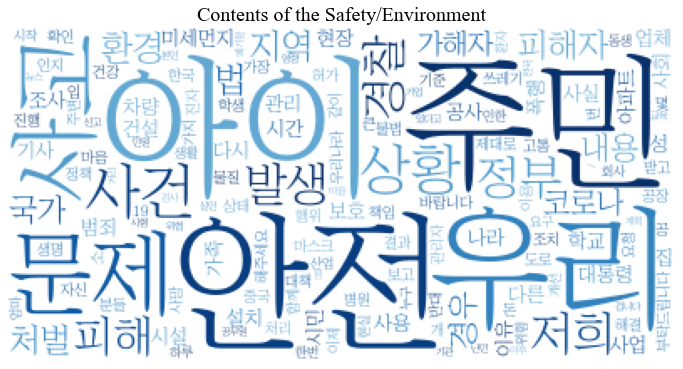

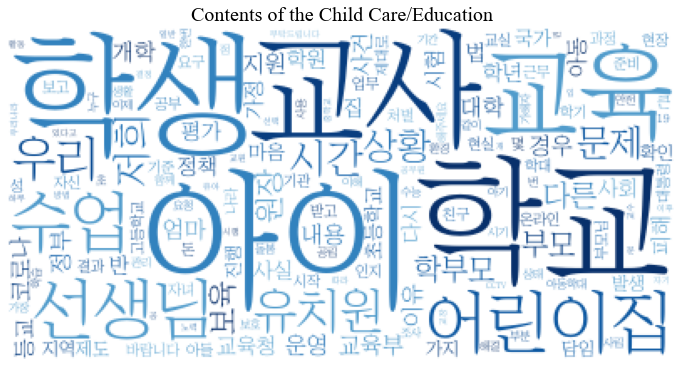

In [ ]:
category_name = ['Political Reform','Human Rights/Gender Eqality','Safety/Environment','Child Care/Education','Health Care']

for a in category_name:
    ctgry_cond = df['category'] == a

    tmp = df[ctgry_cond] 
                 
    tmp_text = ''
    for each_line in tmp['content']: 
          tmp_text = tmp_text + each_line + '\n'
    tokens_ko = okt.morphs(tmp_text)
    
    
    stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"', '!',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국','n','.\\','사람', '국민',
             '\\','**', '생각','***', '서', '하였습니다', '청원', '지금', '님', '사', '지', '알','부터','현재',
             '대','왜','‘', '“', '...', '”', '에서는', '없습니다', '분', '하며', '라는', '해야', '되는', '에도',
             '하게', '-', '[', ']', '시', '본', '장', '곳', '원', '이고', '이라는', '이렇게', '기', '의해','’',
             '이나', '하면', '않고', '살', '비', '여', '모든', '이라고', '하면서', '이라', '됩니다', '은','는','?\\', '니까',
             '이다', '통해', '일부', '아닌', '조', '아니라', '되고', '또', '상', '처럼', ':', '했다',
             '\u2028', ',\\', ':/', '중', '세', 'nhttp', '-\\', '..\\', '또한','명','하지','..','정말','물','많은','"',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국', '\'', '`', '하였습니다',
             ':', '대한민국', '라는', '‘', '’', '”', '“', '님', '씨', '에도', '하게', '알', '-',
             '또', '해야', '지', '분', '에서는', '않고', '아닌', '아니라', '하면', '하였고','...', '아닙니다',
             '없고', '없습니다', '이라는', '한다고', '서', '하며','부터', '또한','명','하지','..','정말','물','많은','"',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','하지만','결국', '\'', '`', '하였습니다',
             ':', '대한민국', '라는', '‘', '’', '”', '“', '님', '씨', '에도', '하게', '알', '-',
             '또', '해야', '지', '분', '에서는', '않고', '아닌', '아니라', '하면', '하였고','...', '아닙니다',
             '없고', '없습니다', '이라는', '한다고', '서', '하며','부터','>', ']\\', '<', '그런데', '않는', '일이',
                 '수가', '이란', '어떻게', '지난', '있고', '있도록', '하다', '하나', '바', '행', '란', '하는데', '그러나',
                 '않습니다','이상','인해','거나', '이는', '으로서', '그나마', '더욱', '뿐','약',',,,','정도',
                 '앓이', '만이','보다','항','되면','인데','계속','동안','이러한','밖에','그런','대다수','▶',
                 '.','=>', '이는', '두', '않는', '며','하나', '그런', '단', '그러나','그런', '이런','이번',
                 '이야기', '간', '모두', '않은','함', '),', '있도록','정','했다는','속','안', '경', '보다', '무엇', '5','4',
                 '다음','6', '그렇게','않습니다','화','손','여러','식','>','위해','이라도', '모씨','구','은', '어떤','해당',
                 '확','해도','이미','했고','있고','앞','날','팀','.{','제발','조차','거','마다','있을','있길','~','얼마나','며',
                 '두','속','간','될','함','날','한다', '에서도','바로','물론', '이며', '많이', '동', '한다는', '해서는', '해서',
                 '라', '면','위해','해']

    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
    ko = nltk.Text(tokens_ko, name= '청원내용')
    
    data = dict(ko.vocab().most_common(150))
    
    # import colormap from matplotlib as a matrix of colors
    cmap = mpl.cm.Blues(np.linspace(0,1,20))
    cmap = mpl.colors.ListedColormap(cmap[-10:,:-1])
    
    wordcloud = WordCloud(font_path="C:\\Users\\Owner\\AppData\\Local\\Microsoft\\Windows\\Fonts\\조선일보명조.ttf",
                      relative_scaling = 0.2,
                      background_color='white',colormap= cmap).generate_from_frequencies(data)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('Contents of the ' + a, fontsize=20)
    if '/' in a: a=a.replace('/','_')
    plt.savefig(a +"_청원내용.png")
    plt.show()